In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga dos dados

In [3]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [6]:
# Checar estrutura do df
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [7]:
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


## EDA

In [8]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

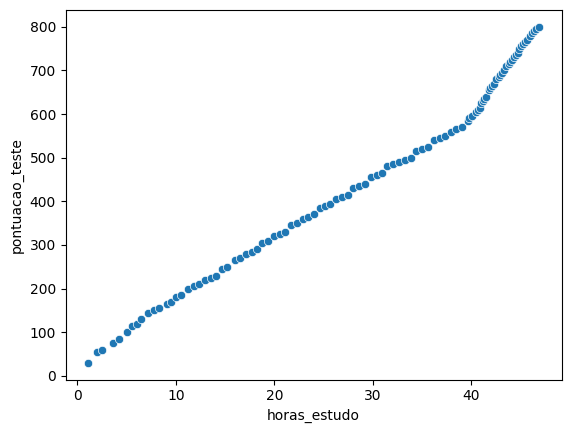

In [9]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

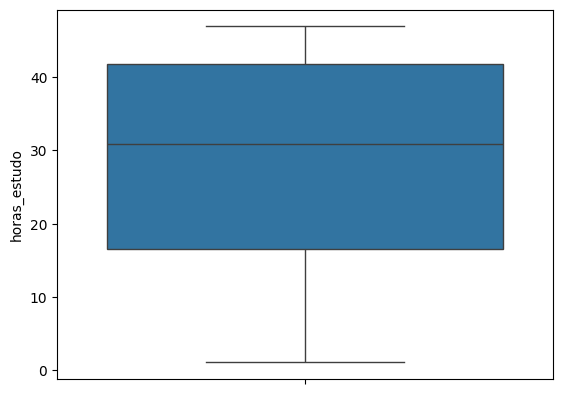

In [10]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

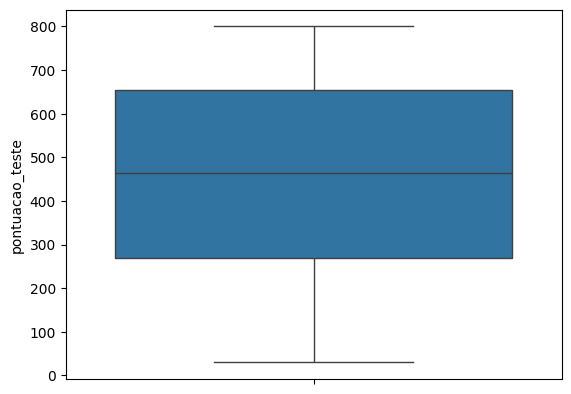

In [11]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

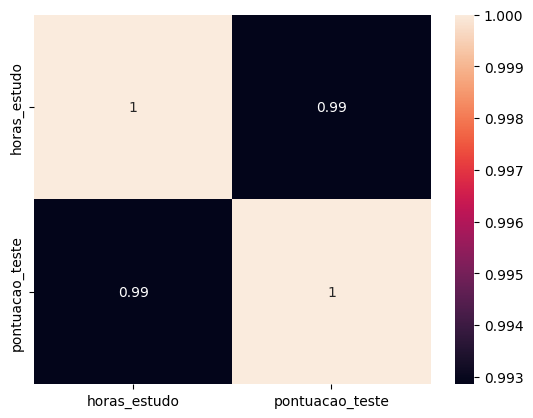

In [12]:
# Verificar correlação
sns.heatmap(df_pontuacao.corr(), annot=True)

<Axes: >

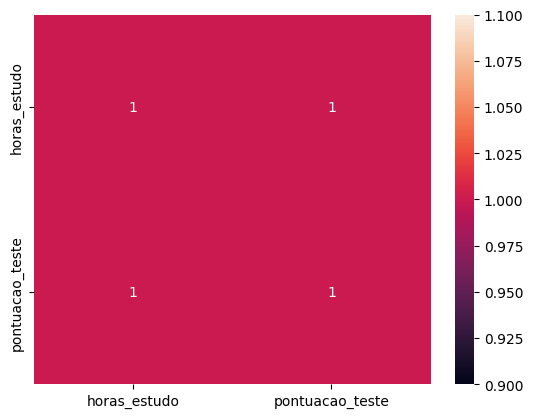

In [13]:
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

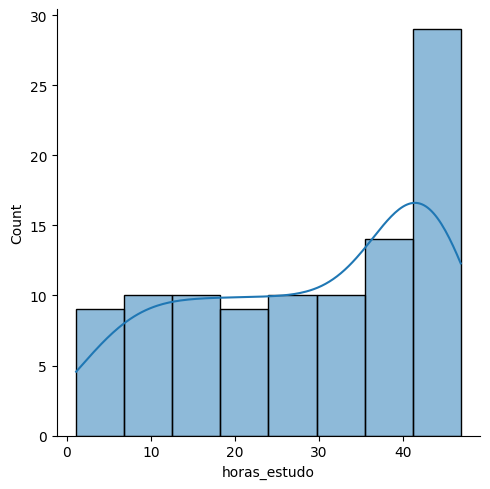

In [15]:
# Histograma das variáveis
sns.displot(df_pontuacao['horas_estudo'], kde=True)

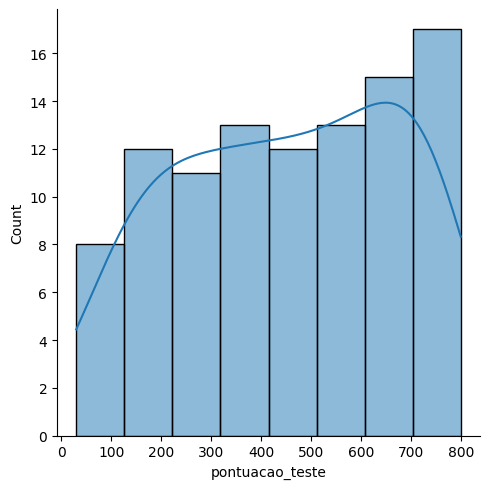

In [16]:
sns.displot(df_pontuacao['pontuacao_teste'], kde=True)

## Treinar Modelo

In [17]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 1), (31, 1), (70, 1), (31, 1))

In [19]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [20]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Imprimir a equação da reta
# y = ax + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 15.642619x + 8.476601


## Validar Modelo - Métricas

In [22]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [24]:
# Calcular métrica R-Squared (R²) ou Coeficiente de Determinação
# Representa a proporção na variação da variável dependente que é explicada pela variável independente
reg_model.score(X_test, y_test)

0.9828400452912442

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, y_pred)

0.9828400452912442

In [26]:
# Calcular a métrica MAE (Mean Absolute Error)
# MAE = Média (y_test - y_pred)
# É uma métrica fácil de interpretar, pois é a média dos erros
# Quanto mais próximo de 0, melhor
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [27]:
# Calcular a métrica MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)²
# É uma métrica que penaliza mais os erros maiores
# Quanto mais próximo de 0, melhor
mean_squared_error(y_test, y_pred)

766.9972992416427

In [30]:
# Calcular a métrica RMSE (Root Mean Squared Error)
# RMSE = raiz quadrada de MSE
# É uma métrica que penaliza mais os erros maiores
# Quanto mais próximo de 0, melhor
import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred))

27.69471608884342

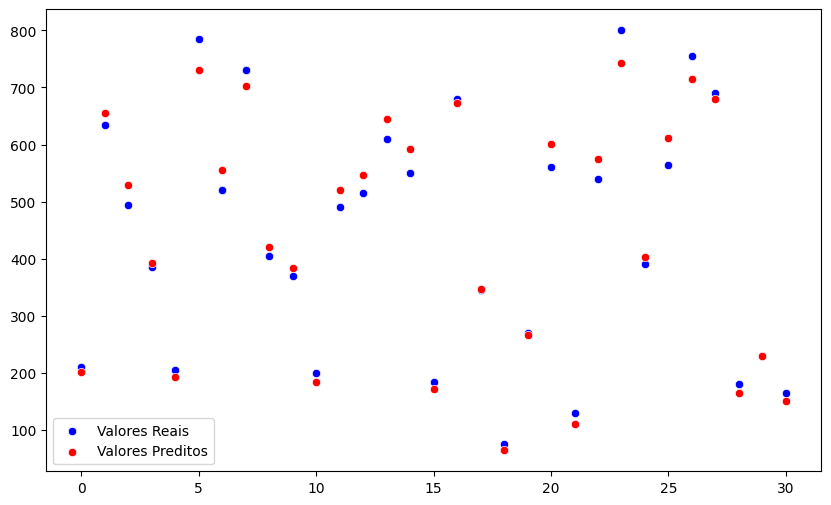

In [33]:
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='b', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='r', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de resíduos

In [34]:
# Calculando os resíduos
residuos = y_test - y_pred

In [36]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - média) / desvio padrão
from scipy.stats import zscore

residuos_std = zscore(residuos)

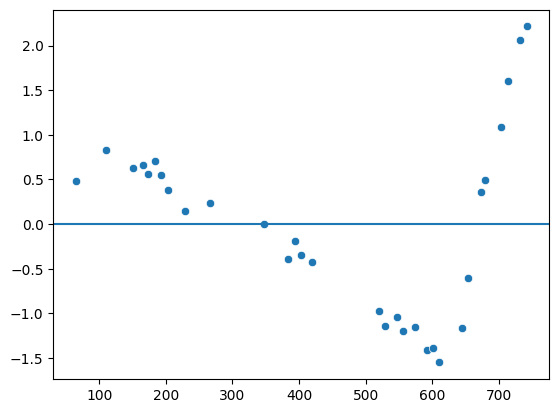

In [41]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2, o modelo é linear

# verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade
# Se tivermos alguma tendência ou padrão (formam um cone, funil, etc), temos heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Quantis dos Resíduos')

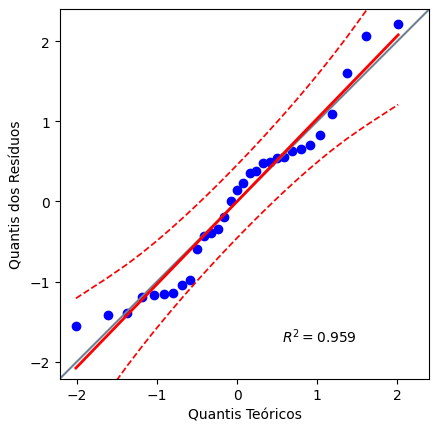

In [45]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos')

In [47]:
# Teste de Normalidade - Shapiro Wilk
# H0: A amostra segue uma distribuição normal
# H1: A amostra não segue uma distribuição normal
# Se o p-valor > 0.05, não rejeitamos H0, ou seja, a amostra segue uma distribuição normal
shapiro(residuos.reshape(-1))

ShapiroResult(statistic=0.9500532226161759, pvalue=0.15663817850304973)

In [49]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0: A amostra segue uma distribuição normal
# H1: A amostra não segue uma distribuição normal
# Se o p-valor > 0.05, não rejeitamos H0, ou seja, a amostra segue uma distribuição normal
kstest(residuos.reshape(-1), 'norm')

KstestResult(statistic=0.48355808450512827, pvalue=3.395368995814077e-07, statistic_location=3.420193326256083, statistic_sign=-1)

### Fazer predições com o modelo

In [50]:
# Se eu estudar 30.4 horas, qual será a minha pontuação?
horas_estudo = 30.4

# Precisamos ajustar o shape
horas_estudo = np.array(horas_estudo).reshape(-1, 1)

# Predição
reg_model.predict(horas_estudo)

array([[484.01220436]])

In [51]:
# Quantas horas estudar para obter 600 pontos?
# y = ax + b
# 600 = ax + b
# x = (600 - b) / a
b = reg_model.intercept_[0]
a = reg_model.coef_[0][0]

horas_estudo = (600 - b) / a
horas_estudo

37.81485802710669

## Salvar modelo para usar depois

In [52]:
import joblib
joblib.dump(reg_model, 'modelo_pontuacao.pkl')

['modelo_pontuacao.pkl']